In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Augmentation


In [3]:
def adjustData(img,flag_multi_class,num_class):
    if(flag_multi_class):
        img = img / 255
    elif(np.max(img) > 1):
        img = img / 255
    return (img)

In [4]:
def geneTrainNpy(image_path,flag_multi_class = False,num_class = 2,image_prefix = "image",image_as_gray = True,mask_as_gray = True):
    image_name_arr = glob.glob(os.path.join(image_path,"%s*.png"%image_prefix))
    image_arr = []
    for index,item in enumerate(image_name_arr):
        img = io.imread(item,as_gray = image_as_gray)
        img = np.reshape(img,img.shape + (1,)) if image_as_gray else img
      
        image_arr.append(img)
    image_arr = np.array(image_arr)
    return image_arr

def trainGenerator(batch_size,train_path,image_folder,aug_dict,image_color_mode = "rgb",image_save_prefix  = "image",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
    image_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    train_generator = zip(image_generator)
    for (img) in train_generator:
        
        yield (img)
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [32]:
myGenerator = trainGenerator(70,'/content/drive/MyDrive/datasetCBL/Color','Healthy',data_gen_args,save_to_dir = "/content/drive/MyDrive/Augmentation")


In [33]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import os
import glob
import skimage.io as io
import skimage.transform as trans

num_batch = 15
for i,batch in enumerate(myGenerator):
    if(i >= num_batch):
        break

import matplotlib.pyplot as plt
import random
image_arr = geneTrainNpy("/content/drive/MyDrive/Augmentation")

Found 152 images belonging to 1 classes.


In [34]:
len(image_arr)

830

In [44]:
image_arr


[[array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784])],
 [array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784])],
 [array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784])],
 [array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array([0.66854784])],
 [array([0.66854784]),
  array([0.66854784]),
  array([0.66854784]),
  array

In [66]:
files="/content/drive/MyDrive/Augmentation"

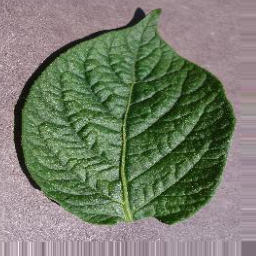

In [72]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/drive/MyDrive/Augmentation/image_0_1164522.png')
cv2_imshow(img)

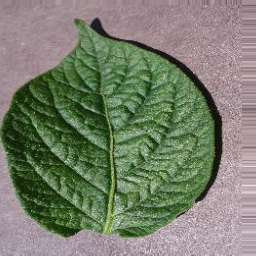

In [76]:

img1 = cv2.imread('/content/drive/MyDrive/Augmentation/image_0_2639607.png')
cv2_imshow(img1)

In [7]:
data_dir = "/content/drive/MyDrive/test"
BATCH_SIZE = 32
IMG_SIZE = (255, 255)

In [8]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [9]:
train_dataset = image_dataset_from_directory(data_dir,
                                             shuffle=True,
                                             label_mode = 'categorical',
                                             validation_split = 0.2,
                                             batch_size=BATCH_SIZE,
                                             seed = 42,
                                             subset = "training",
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(data_dir,
                                             shuffle=True,
                                             label_mode = 'categorical',
                                             validation_split = 0.2,
                                             batch_size=BATCH_SIZE,
                                             seed = 42,
                                             subset = "validation",
                                             image_size=IMG_SIZE)

Found 2830 files belonging to 3 classes.
Using 2264 files for training.
Found 2830 files belonging to 3 classes.
Using 566 files for validation.


In [82]:
class_names = train_dataset.class_names
num_classes = len(class_names)

for i in range(1, num_classes + 1):
    print(str(i) + ". ", class_names[i - 1])

1.  Augmentation
2.  Early_blight
3.  Late_blight


Debut1 inception
### **Nouvelle section**


In [84]:
import numpy as np
from re import sub
import tensorflow as tf
from tensorflow.keras import metrics

import matplotlib.colors as mcolors

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image


import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image_dataset_from_directory

print("Done importing packages!")

Done importing packages!


In [85]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 15
Number of test batches: 3


In [86]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [87]:
METRICS = [
      metrics.CategoricalAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
]

In [88]:
IMG_SHAPE = IMG_SIZE + (3,)
preprocess_input = tf.keras.applications.inception_v3.preprocess_input 

base_model = tf.keras.applications.InceptionV3(
                                include_top=False,
                                weights="imagenet",
                                input_shape=IMG_SHAPE,
                            )

87910968/87910968 [==============================] - 1s 0us/step


In [89]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 2048)


In [90]:
base_model.trainable = True

In [91]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

print(feature_batch_average.shape)

(32, 2048)


In [92]:
prediction_layer = tf.keras.layers.Dense(num_classes, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 3)


In [ ]:
#base_learning_rate = 0.001
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
#             metrics=METRICS)

# Building CNN From *Scratch*

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.models import Model 
from tensorflow.keras.models import Sequential 
import numpy as np 
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam

In [4]:
cnn_model=keras.models.Sequential([
    
                                    keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[255,255,3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64,kernel_size=3),
                                        keras.layers.MaxPooling2D (pool_size=(2, 2)),
                                        keras.layers.Conv2D(filters=128, kernel_size=3),
                                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                                        keras.layers.Conv2D(filters=256, kernel_size=3),
                                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                                        keras.layers.Dropout (0.5),
                                        keras.layers.Flatten(), 
                                        keras.layers.Dense(units=128, activation='relu'), 
                                        keras.layers.Dropout (0.1),
                                        keras.layers.Dense(units=256, activation='relu'),
                                        keras.layers.Dropout (0.25),
                                        keras.layers.Dense(units=3, activation='softmax') 
])

In [5]:
cnn_model.compile( optimizer =Adam(lr=0.0001), loss='categorical_crossentropy', metrics='accuracy')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
history=cnn_model.fit(train_dataset,epochs=20,verbose=1,validation_data=validation_dataset)

Epoch 1/20
71/71 [==============================] - 405s 6s/step - loss: 1.8495 - accuracy: 0.5133 - val_loss: 0.7429 - val_accuracy: 0.6961
Epoch 2/20
71/71 [==============================] - 337s 5s/step - loss: 0.8537 - accuracy: 0.6126 - val_loss: 0.6108 - val_accuracy: 0.7792
Epoch 3/20
71/71 [==============================] - 331s 5s/step - loss: 0.7708 - accuracy: 0.6740 - val_loss: 0.5217 - val_accuracy: 0.8057
Epoch 4/20
71/71 [==============================] - 336s 5s/step - loss: 0.6469 - accuracy: 0.7438 - val_loss: 0.4093 - val_accuracy: 0.9028
Epoch 5/20
71/71 [==============================] - 333s 5s/step - loss: 0.5170 - accuracy: 0.8039 - val_loss: 0.3044 - val_accuracy: 0.9011
Epoch 6/20
71/71 [==============================] - 334s 5s/step - loss: 0.4902 - accuracy: 0.8242 - val_loss: 0.2751 - val_accuracy: 0.9099
Epoch 7/20
71/71 [==============================] - 333s 5s/step - loss: 0.4611 - accuracy: 0.8304 - val_loss: 0.2634 - val_accuracy: 0.9028
Epoch 8/20
71

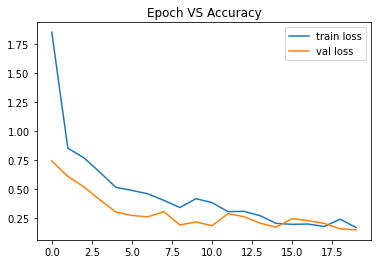

<Figure size 432x288 with 0 Axes>

In [85]:
plt.plot(history.history['loss'], label='train loss') 
plt.plot(history.history['val_loss'], label='val loss') 
plt.legend()
plt.title("Epoch VS Accuracy")
plt.show()
plt.savefig('lossVal_acc')

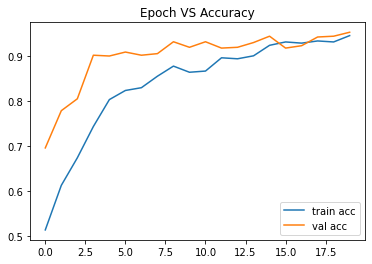

<Figure size 432x288 with 0 Axes>

In [86]:
plt.plot(history.history['accuracy'], label='train acc') 
plt.plot(history.history['val_accuracy'], label='val acc') 
plt.legend()
plt.title("Epoch VS Accuracy")
plt.show()
plt.savefig('AccVal_acc')

In [12]:
y_prediction=cnn_model.predict(validation_dataset)

18/18 [==============================] - 28s 1s/step


In [13]:
y_prediction

array([[1.5287246e-07, 9.9999982e-01, 4.9342869e-08],
       [6.7180903e-23, 9.9999994e-01, 2.8964627e-18],
       [3.1200124e-02, 6.8055049e-02, 9.0074480e-01],
       ...,
       [5.4657617e-06, 9.9997628e-01, 1.8211022e-05],
       [1.8177682e-09, 9.9999976e-01, 2.3150621e-07],
       [7.4048832e-02, 8.9704087e-03, 9.1698080e-01]], dtype=float32)

In [29]:
validation_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [15]:
#prediction class
y_prediction=np.argmax(y_prediction,axis=1)

In [16]:
y_prediction

array([1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0,
       2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2,
       2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2,
       0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1,

In [32]:
#test mod
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [33]:
cnn_model.save("Cnn.h5")

In [35]:
model=load_model('Cnn.h5')


In [72]:
imgg=image.load_img('/content/drive/MyDrive/datasetCBL/Color/Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG',target_size=[255,255,3])
x=image.img_to_array(imgg)
x


array([[[163., 151., 161.],
        [145., 133., 143.],
        [130., 118., 128.],
        ...,
        [163., 151., 161.],
        [162., 150., 160.],
        [154., 142., 152.]],

       [[153., 141., 151.],
        [144., 132., 142.],
        [134., 122., 132.],
        ...,
        [153., 141., 151.],
        [149., 137., 147.],
        [141., 129., 139.]],

       [[147., 135., 145.],
        [150., 138., 148.],
        [146., 134., 144.],
        ...,
        [154., 142., 152.],
        [151., 139., 149.],
        [147., 135., 145.]],

       ...,

       [[128., 116., 130.],
        [128., 116., 130.],
        [129., 117., 131.],
        ...,
        [127., 119., 132.],
        [130., 122., 135.],
        [136., 128., 141.]],

       [[131., 119., 133.],
        [131., 119., 133.],
        [134., 122., 136.],
        ...,
        [126., 118., 131.],
        [130., 122., 135.],
        [138., 130., 143.]],

       [[134., 122., 136.],
        [134., 122., 136.],
        [138., 1

# InceptionV3_F


In [55]:
import numpy as np
from re import sub
import tensorflow as tf
from tensorflow.keras import metrics

import matplotlib.colors as mcolors

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from glob import glob

import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.layers import Input, Lambda,Dense, Flatten
from tensorflow.keras.models import Model 
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras. applications.inception_v3 import preprocess_input
from tensorflow. keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np 
from glob import glob 
import matplotlib.pyplot as plt



print("Done importing packages!")

Done importing packages!


In [60]:
Image_size = [255, 255]
transfer_model=InceptionV3(input_shape=Image_size + [3],weights='imagenet',include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [61]:
for layer in transfer_model.layers:
  layer.trainable=False

In [62]:
no_of_classes=3

In [63]:
Bottle_neck_layer_output= Flatten()(transfer_model.output)

In [64]:
output_layer=Dense(no_of_classes,activation='softmax')(Bottle_neck_layer_output)

In [65]:
transfer_learning_model=Model(inputs=transfer_model.input,outputs=output_layer)

In [66]:
transfer_learning_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 255, 255, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d_4[0][0]']               
 alization)                     )                                                             

In [70]:
transfer_learning_model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [71]:
result= transfer_learning_model.fit_generator(train_dataset,
validation_data=validation_dataset,
 epochs=20,
steps_per_epoch=len(train_dataset), 
validation_steps=len(validation_dataset)
)

Epoch 1/20


<ipython-input-71-72b81576f8b5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result= transfer_learning_model.fit_generator(train_dataset,


71/71 [==============================] - 370s 5s/step - loss: 61.4546 - accuracy: 0.6223 - val_loss: 19.8567 - val_accuracy: 0.7473
Epoch 2/20
71/71 [==============================] - 361s 5s/step - loss: 13.2464 - accuracy: 0.8238 - val_loss: 13.1620 - val_accuracy: 0.8074
Epoch 3/20
71/71 [==============================] - 361s 5s/step - loss: 12.8583 - accuracy: 0.8269 - val_loss: 9.4160 - val_accuracy: 0.8657
Epoch 4/20
71/71 [==============================] - 363s 5s/step - loss: 5.3891 - accuracy: 0.9064 - val_loss: 17.0056 - val_accuracy: 0.8145
Epoch 5/20
71/71 [==============================] - 361s 5s/step - loss: 8.3202 - accuracy: 0.8679 - val_loss: 29.3387 - val_accuracy: 0.7120
Epoch 6/20
71/71 [==============================] - 363s 5s/step - loss: 9.2225 - accuracy: 0.8715 - val_loss: 12.8502 - val_accuracy: 0.8604
Epoch 7/20
71/71 [==============================] - 361s 5s/step - loss: 6.4518 - accuracy: 0.9019 - val_loss: 21.7578 - val_accuracy: 0.8092
Epoch 8/20
71/7

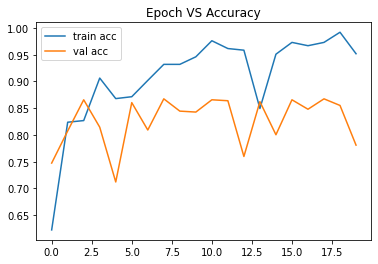

<Figure size 432x288 with 0 Axes>

In [83]:
plt.plot(result.history['accuracy'], label='train acc') 
plt.plot(result.history['val_accuracy'], label='val acc') 
plt.legend()
plt.title("Epoch VS Accuracy")
plt.show()
plt.savefig('AccVal_acc')

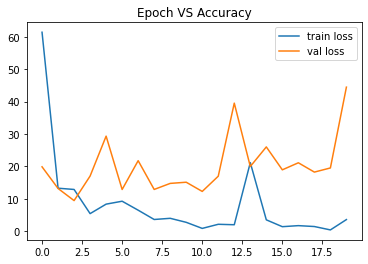

<Figure size 432x288 with 0 Axes>

In [84]:
plt.plot(result.history['loss'], label='train loss') 
plt.plot(result.history['val_loss'], label='val loss') 
plt.legend()
plt.title("Epoch VS Accuracy")
plt.show()
plt.savefig('lossVal_acc')

In [73]:
y_prediction=transfer_learning_model.predict(validation_dataset)
y_prediction

18/18 [==============================] - 79s 4s/step


array([[9.9999744e-01, 0.0000000e+00, 2.5118193e-06],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [74]:
y_prediction=np.argmax(y_prediction,axis=1)
y_prediction

array([0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 0,
       1, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 2,
       0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2,
       2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0,
       0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2,
       2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 2,

In [75]:
transfer_learning_model.save('inceptionv3.h5')
incept=load_model('inceptionv3.h5')

In [76]:
img1=image.load_img('/content/drive/MyDrive/datasetCBL/Color/Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG',target_size=(255,255))
x=image.img_to_array(img1)
x


array([[[163., 151., 161.],
        [145., 133., 143.],
        [130., 118., 128.],
        ...,
        [163., 151., 161.],
        [162., 150., 160.],
        [154., 142., 152.]],

       [[153., 141., 151.],
        [144., 132., 142.],
        [134., 122., 132.],
        ...,
        [153., 141., 151.],
        [149., 137., 147.],
        [141., 129., 139.]],

       [[147., 135., 145.],
        [150., 138., 148.],
        [146., 134., 144.],
        ...,
        [154., 142., 152.],
        [151., 139., 149.],
        [147., 135., 145.]],

       ...,

       [[128., 116., 130.],
        [128., 116., 130.],
        [129., 117., 131.],
        ...,
        [127., 119., 132.],
        [130., 122., 135.],
        [136., 128., 141.]],

       [[131., 119., 133.],
        [131., 119., 133.],
        [134., 122., 136.],
        ...,
        [126., 118., 131.],
        [130., 122., 135.],
        [138., 130., 143.]],

       [[134., 122., 136.],
        [134., 122., 136.],
        [138., 1

In [77]:
x=x/255

In [80]:
x==np.expand_dims(x,axis=0)
xx=preprocess_input(x)
xx.shape

(255, 255, 3)

In [81]:
predic=incept.predict(xx)

ValueError: ignored